# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [159]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/대외활동/동아리/투빅스/2주차/assignment2_data.csv",index_col=0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [81]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [82]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [83]:
# 6019개의 데이터 중, New_Price의 5195개의 데이터가 결측치 이므로 해당 칼럼은 사용X
data.drop(['New_Price'],axis=1,inplace=True)

In [34]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<Axes: ylabel='Density'>

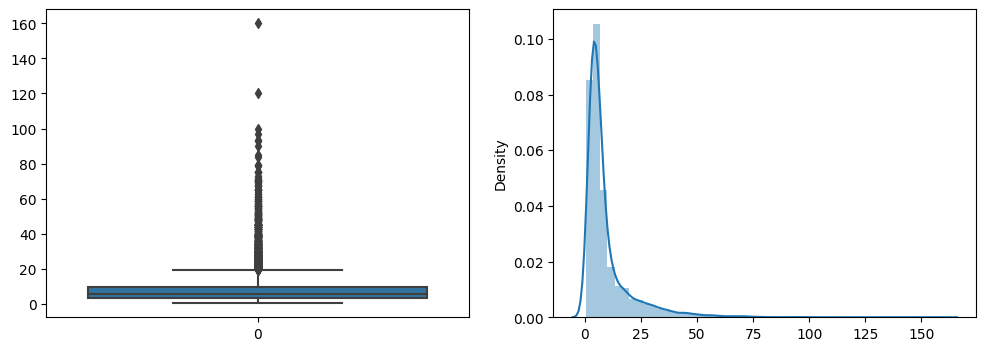

In [35]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

- 이상치 존재
- skewed 되어있어 조치 필요 : Positive Skewness

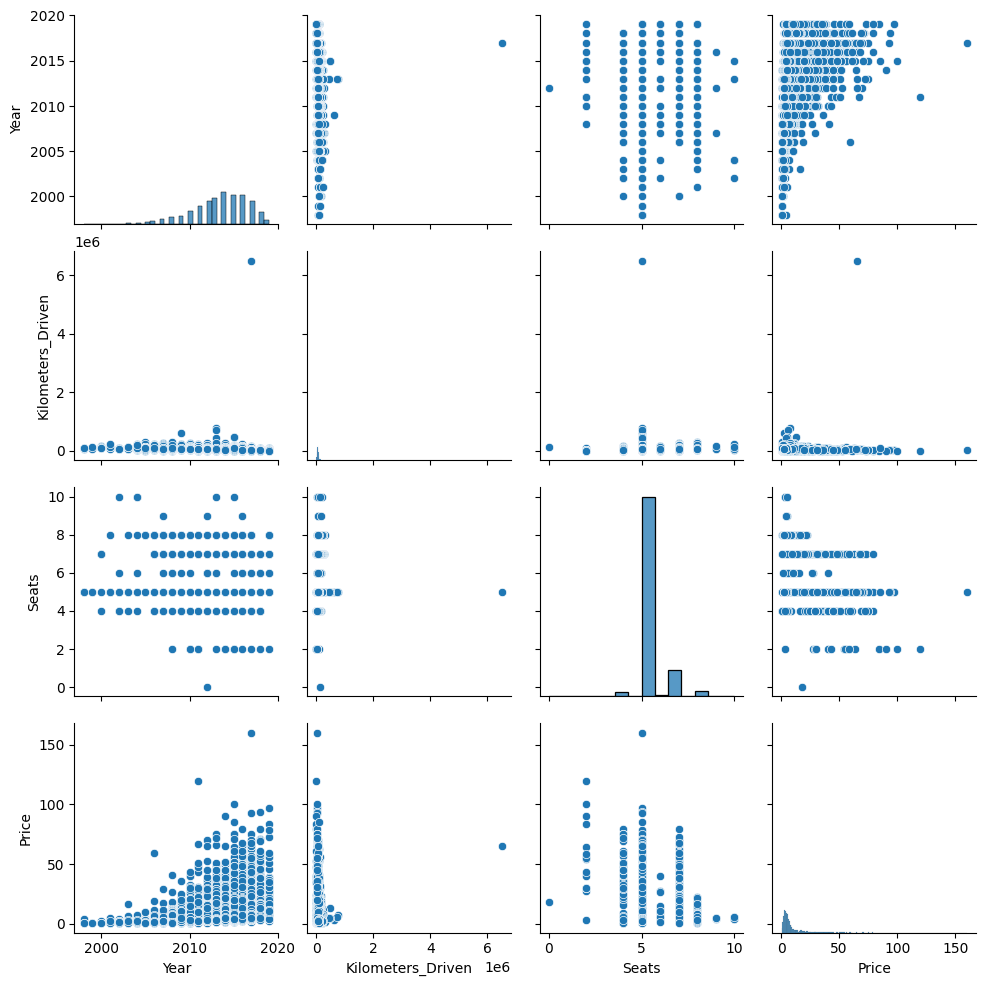

In [36]:
# 회귀분석 기본 가정 검토 : 선형성
sns.pairplot(data)

0.4173906918413524


<Axes: xlabel='Price', ylabel='Density'>

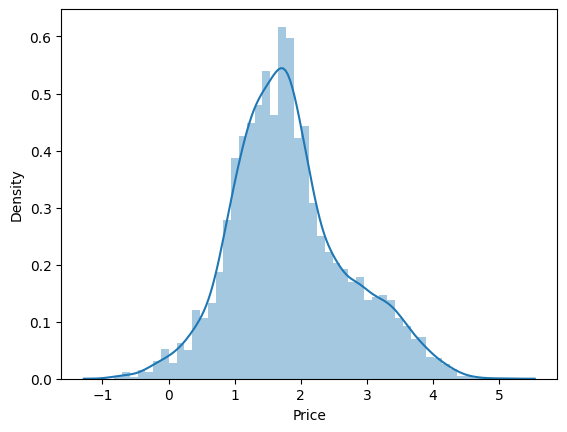

In [84]:
#Log Transform을 활용한 skewness 해결

df_log=np.log(data["Price"])
print(df_log.skew())
sns.distplot(df_log)

In [85]:
data['Price'] = data['Price'].apply(lambda x: np.log(x))

In [86]:
data['company']=data['Name'].apply(lambda x: x.split()[0] if pd.notnull(x) else x)
data['Mileage(km/kg)']=data['Mileage'].apply(lambda x: x.split()[0] if pd.notnull(x) else x)
data['Engine(CC)']=data['Engine'].apply(lambda x: x.split()[0] if pd.notnull(x) else x)
data['Power(bhp)']=data['Power'].apply(lambda x: x.split()[0] if pd.notnull(x) else x)

In [95]:
data.dropna(axis=0,inplace=True)
data = data.reset_index(drop=True)

In [96]:
x = 'n'
count = 0
position = []
for i in range(data.shape[0]):
    if data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)

data = data.drop(data.index[position])
data = data.reset_index(drop=True)

In [97]:
data['Mileage(km/kg)'] = data['Mileage(km/kg)'].astype(float)
data['Engine(CC)'] = data['Engine(CC)'].astype(float)
data['Power(bhp)'] = data['Power(bhp)'].astype(float)

- 변수 타입 정리 및 name을 통한 파생변수 company 생성

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [104]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'company', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)'],
      dtype='object')

In [122]:
n_cols=['Year', 'Kilometers_Driven', 'Seats', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)']

cat_cols=['Location','Fuel_Type', 'Transmission',
       'Owner_Type', 'company']

In [147]:
data2 = pd.get_dummies(data)
data2.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'company_Ambassador', 'company_Audi', 'company_BMW', 'company_Bentley',
       'company_Chevrolet', 'company_Datsun', 'company_Fiat', 'company_Force',
       'company_Ford', 'company_Honda', 'company_Hyundai', 'company_ISUZU',
       'company_Isuzu', 'company_Jaguar', 'company_Jeep',
       'company_Lamborghini', 'company_Land', 'company_Mahindra',
       'company_Maruti', 'company_Mercedes-Benz', 'company_M

- 범주형 변수 one-hot encoding

In [109]:
X = data.drop(['Price'], axis=1)
y = data.Price

In [111]:
# correlation matrix
X.corr()

,Year,Kilometers_Driven,Seats,Mileage(km/kg),Engine(CC),Power(bhp)
Year,1.000000,-0.169369,0.007833,0.285623,-0.068045,0.014531
Kilometers_Driven,-0.169369,1.000000,0.083072,-0.060608,0.093030,0.033490
Seats,0.007833,0.083072,1.000000,-0.331576,0.401116,0.101460
Mileage(km/kg),0.285623,-0.060608,-0.331576,1.000000,-0.637258,-0.538844
Engine(CC),-0.068045,0.093030,0.401116,-0.637258,1.000000,0.866301
Power(bhp),0.014531,0.033490,0.101460,-0.538844,0.866301,1.000000


<Axes: >

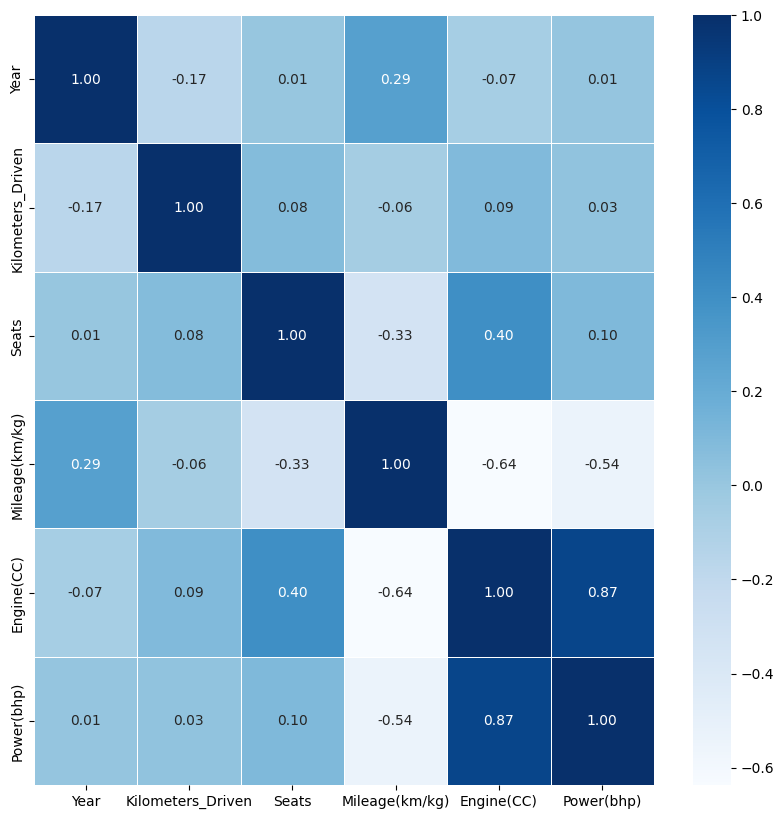

In [112]:
# heatmap : correlation matrix 시각화
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

- Engine(CC)와 Power(bhp)간의 상관계수가 높음

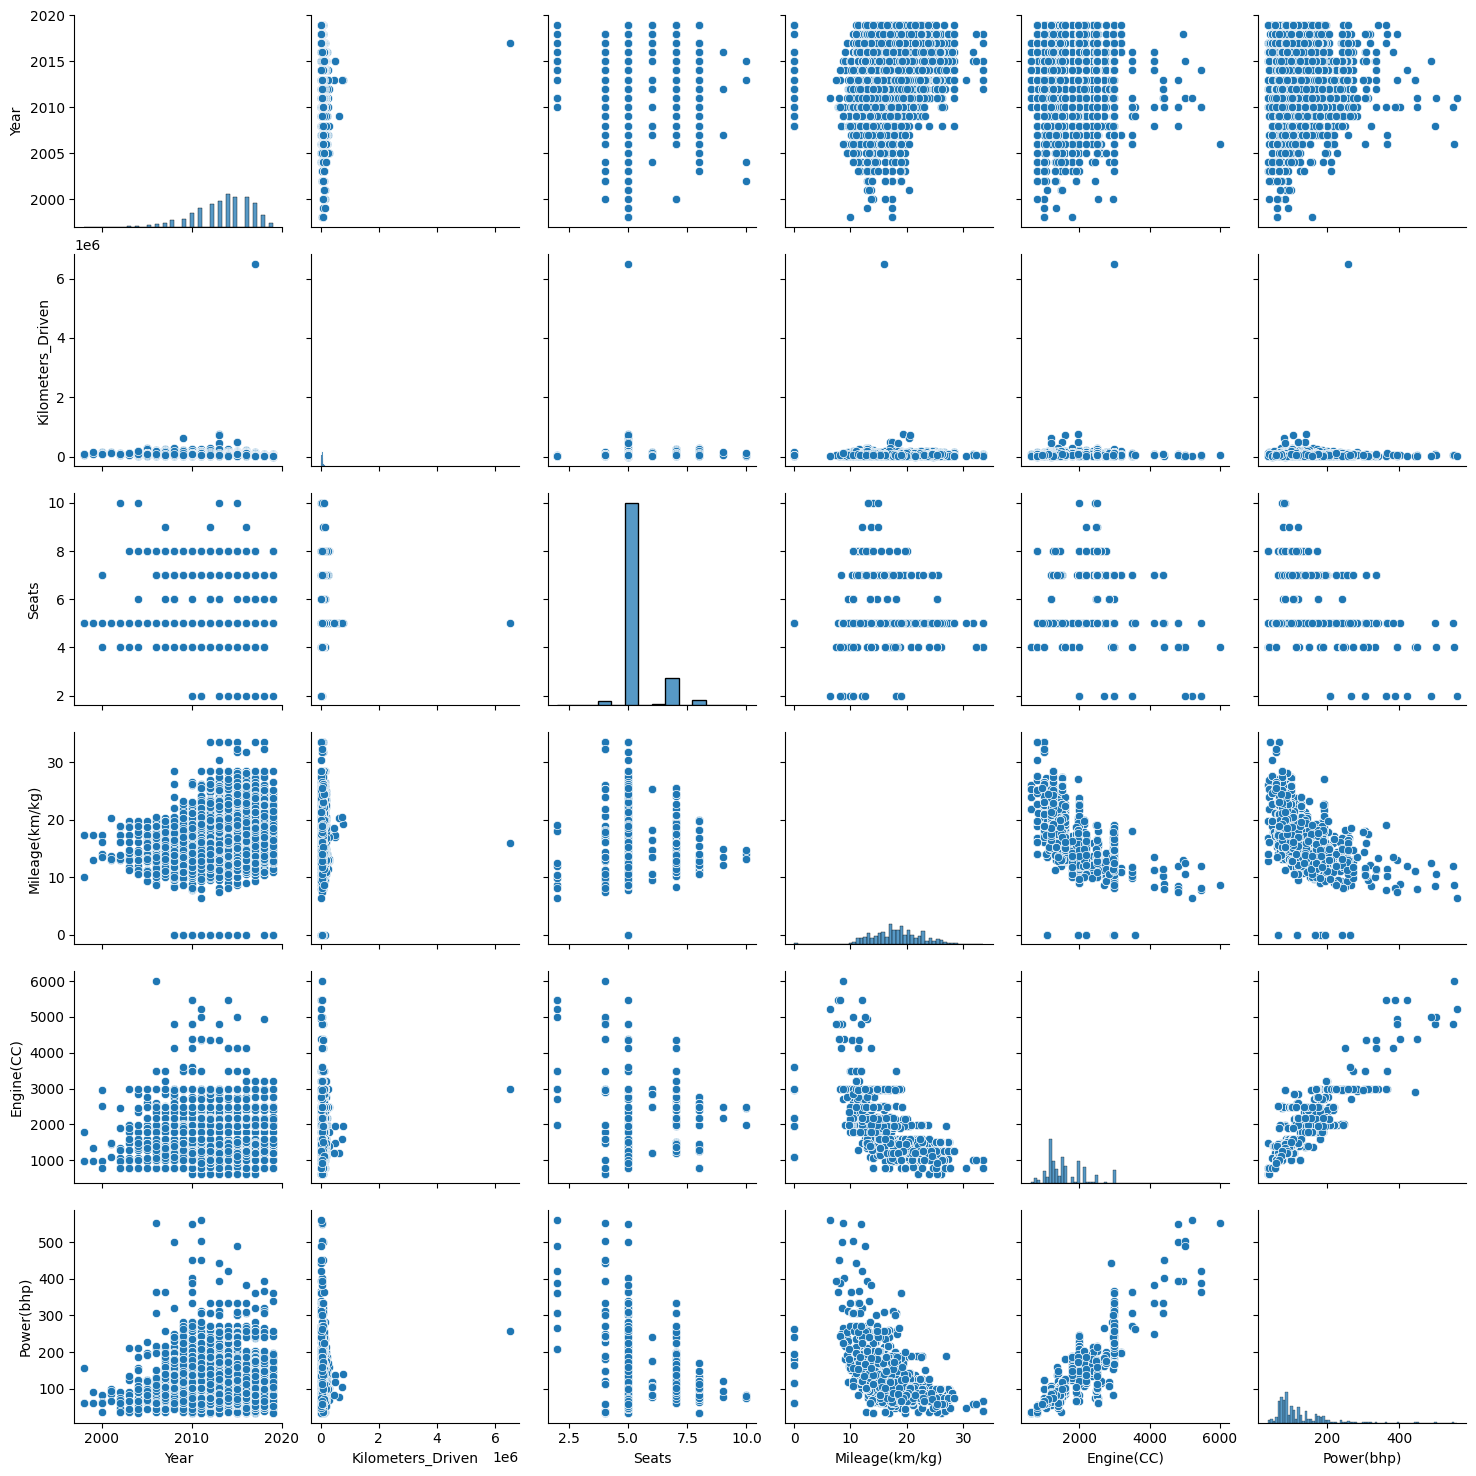

In [113]:
# 변수들 사이의 pairplot
sns.pairplot(X)

- 실제 산점도에서도 둘 사이에서 강한 선형 관계가 보임

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [123]:
# VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[n_cols].values, i) for i in range(X[n_cols].shape[1])]
vif["features"] = X[n_cols].columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,127.552438,Year
2,75.034589,Seats
4,60.079233,Engine(CC)
3,31.865500,Mileage(km/kg)
5,30.846298,Power(bhp)
1,1.425195,Kilometers_Driven


In [126]:
X2=X[n_cols]
X2.drop(['Year'],axis=1,inplace=True)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,59.917616,Engine(CC)
1,40.113831,Seats
4,27.793704,Power(bhp)
2,13.704878,Mileage(km/kg)
0,1.424158,Kilometers_Driven


In [128]:
X3=X2.drop(['Engine(CC)'],axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,18.381842,Seats
2,10.755771,Mileage(km/kg)
3,5.492570,Power(bhp)
0,1.411076,Kilometers_Driven


In [129]:
X3=X2.drop(['Engine(CC)','Seats'],axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,3.259405,Mileage(km/kg)
2,3.202422,Power(bhp)
0,1.381777,Kilometers_Driven


- 'Year','Engine(CC)',' Seats' 제거했더니, 다중공선성 사라짐

In [130]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [131]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)

In [132]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression()

In [133]:
# predict
pred = model.predict(X_train)

In [134]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.6061695368956572

In [135]:
mean_squared_error(y_train, pred)

0.2925902294759355

In [136]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[-4.73974266e-07  2.81370669e-02  1.36201618e-02]
-0.18812562291977875


In [137]:
# test data R-square
model.score(X_test, y_test)

0.6248590753207357

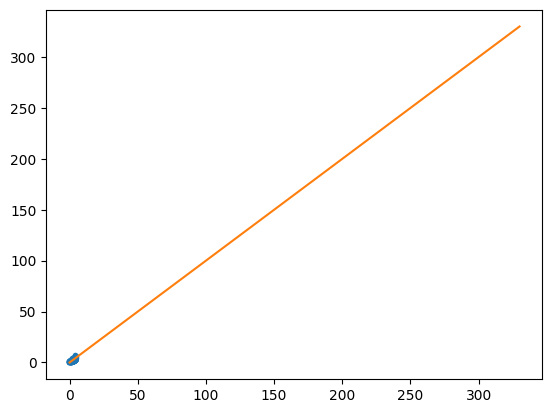

In [138]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [139]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge()

In [140]:
# R-square
ridge.score(X_train,y_train)

0.6061695368919586

In [141]:
# Lasso R-square
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5964447147401231

In [148]:
data3 = data2.drop(['Year','Engine(CC)','Seats'], axis=1)
data3.columns

Index(['Kilometers_Driven', 'Price', 'Mileage(km/kg)', 'Power(bhp)',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'company_Ambassador',
       'company_Audi', 'company_BMW', 'company_Bentley', 'company_Chevrolet',
       'company_Datsun', 'company_Fiat', 'company_Force', 'company_Ford',
       'company_Honda', 'company_Hyundai', 'company_ISUZU', 'company_Isuzu',
       'company_Jaguar', 'company_Jeep', 'company_Lamborghini', 'company_Land',
       'company_Mahindra', 'company_Maruti', 'company_Mercedes-Benz',
       'company_Mini', 'company_Mitsubishi', 'co

In [150]:
X2 = data3.drop(["Price"], axis=1)
y = data3.Price

In [151]:
import statsmodels.api as sm
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     447.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:12:54   Log-Likelihood:                -2886.8
No. Observations:                5872   AIC:                             5874.
Df Residuals:                    5822   BIC:                             6208.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

In [154]:
# p-value 값이 큰 age 변수 제거해보기
X3 = X2.drop(["Location_Ahmedabad"], axis=1)
y = data3.Price

model = sm.OLS(y, X3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     447.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:15:28   Log-Likelihood:                -2886.8
No. Observations:                5872   AIC:                             5874.
Df Residuals:                    5822   BIC:                             6208.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

- 성능에 크게 변화 X
- 성능 나쁘지 않음